# Clustering DataSet Auto Mobile

In [2]:
# Step 1. Memanggil Library yang dibutuhkan 

%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans

In [3]:
# Step 2. Memanggil dataset 
datasetspec = pd.read_csv('automobile-spec.csv')
datasetlosses = pd.read_csv('automobile-losses.csv')
datasetrisk = pd.read_csv('automobile-risk.csv')

In [4]:
datasetspec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
datasetspec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

In [15]:
datasetrisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
ID           205 non-null int64
symboling    205 non-null int64
dtypes: int64(2)
memory usage: 3.3 KB


In [16]:
datasetrisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
ID           205 non-null int64
symboling    205 non-null int64
dtypes: int64(2)
memory usage: 3.3 KB


For the next analysis, i want to use datasetspec only.

In [29]:
spec=datasetspec[['make','engine-size','horsepower','price']]
spec.head(10)

,make,engine-size,horsepower,price
0,alfa-romero,130,111.0,13495.0
1,alfa-romero,130,111.0,16500.0
2,alfa-romero,152,154.0,16500.0
3,audi,109,102.0,13950.0
4,audi,136,115.0,17450.0
5,audi,136,110.0,15250.0
6,audi,136,110.0,17710.0
7,audi,136,110.0,18920.0
8,audi,131,140.0,23875.0
9,audi,131,160.0,NaN


In [30]:
spec.tail(10)

,make,engine-size,horsepower,price
195,volvo,141,114.0,13415.0
196,volvo,141,114.0,15985.0
197,volvo,141,114.0,16515.0
198,volvo,130,162.0,18420.0
199,volvo,130,162.0,18950.0
200,volvo,141,114.0,16845.0
201,volvo,141,160.0,19045.0
202,volvo,173,134.0,21485.0
203,volvo,145,106.0,22470.0
204,volvo,141,114.0,22625.0


## K-Means Clustering

In [60]:
# Cluster by price and horse power
datakmeans=spec[['horsepower','price']]

# fill the missing values with mean

datakmeans['horsepower'] = datakmeans['horsepower'].fillna((datakmeans['horsepower'].mean()))
datakmeans['price'] = datakmeans['price'].fillna((datakmeans['price'].mean()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
datakmeans.isnull().sum()

horsepower    0
price         0
dtype: int64

In [62]:
datakmeans.head(20)

,horsepower,price
0,111.0,13495.000000
1,111.0,16500.000000
2,154.0,16500.000000
3,102.0,13950.000000
4,115.0,17450.000000
5,110.0,15250.000000
6,110.0,17710.000000
7,110.0,18920.000000
8,140.0,23875.000000
9,160.0,13207.129353


In [42]:
datakmeans.tail()

,horsepower,price
200,114.0,16845.0
201,160.0,19045.0
202,134.0,21485.0
203,106.0,22470.0
204,114.0,22625.0


In [64]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(datakmeans)

Text(0.5, 1.0, 'Grafik Spec Mobil')

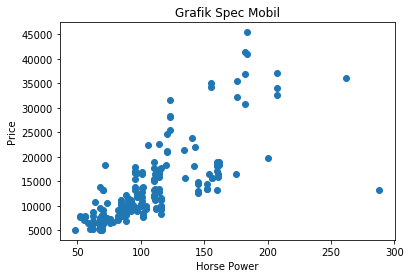

In [65]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Horse Power")
plt.ylabel("Price")
plt.title("Grafik Spec Mobil")

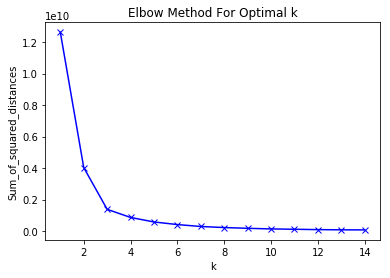

In [66]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Pilih k=3 untuk banyak kelas

In [67]:
# Step 5. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[   81.78333333  8385.525     ]
 [  125.93650794 16971.6984127 ]
 [  176.75       34997.6875    ]]


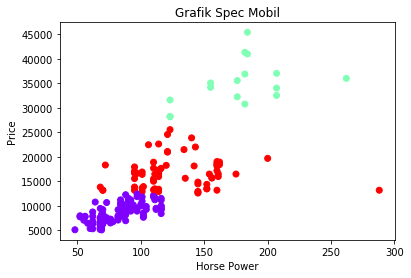

In [68]:
# Step 7 Visualisasi Hasil 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Horse Power")
plt.ylabel("Price")
plt.title("Grafik Spec Mobil")
plt.show()

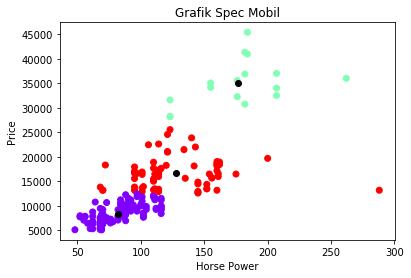

In [120]:
# Step 8 Menampilkan hasil centroid 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Horse Power")
plt.ylabel("Price")
plt.title("Grafik Spec Mobil")
plt.show()

In [70]:
# Memasukkan hasil label ke dalam suatu data frame
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

In [117]:
a=pd.DataFrame(kmeans.labels_)
outputkmeans=pd.concat([spec,a],axis=1)
outputkmeans=outputkmeans.rename(columns={0:'cluster'})
outputkmeans

,make,engine-size,horsepower,price,cluster
0,alfa-romero,130,111.0,13495.0,2
1,alfa-romero,130,111.0,16500.0,2
2,alfa-romero,152,154.0,16500.0,2
3,audi,109,102.0,13950.0,2
4,audi,136,115.0,17450.0,2
5,audi,136,110.0,15250.0,2
6,audi,136,110.0,17710.0,2
7,audi,136,110.0,18920.0,2
8,audi,131,140.0,23875.0,2
9,audi,131,160.0,NaN,2


In [77]:
result=outputkmeans['cluster'].value_counts()
result=pd.DataFrame(result)
result

,cluster
0,121
2,68
1,16


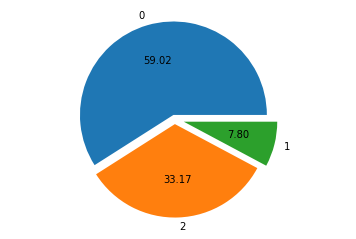

In [81]:
explode = (0.05, 0.05, 0.1)

plt.pie(result['cluster'],labels=result.index, autopct='%.2f', explode=explode)

plt.axis('equal')

plt.show()

Pie Chart dari persentase jumlah mobil dari masing-masing cluster

## Hierarchical Clustering

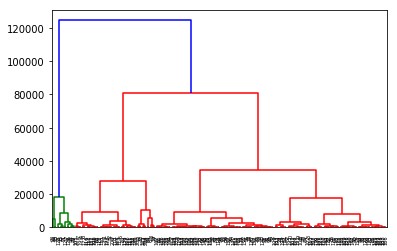

In [83]:
# Step 5. Membentuk dendogram dengan metode ward 
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

Dengan menggunakan method linkage war ternyata dihasilkan 3 clusters

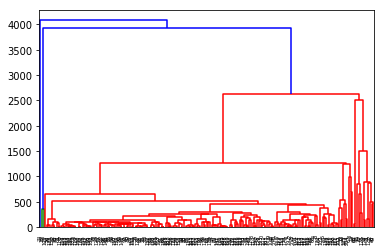

In [84]:
# Step 5. Membentuk dendogram dengan metode single 
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

Dengan menggunakan method linkage single ternyata dihasilkan 3 clusters

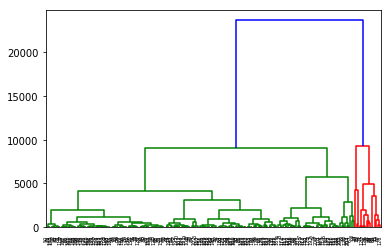

In [85]:
# Step 5. Membentuk dendogram dengan metode average
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

Dengan menggunakan method linkage average ternyata dihasilkan 2 clusters juga

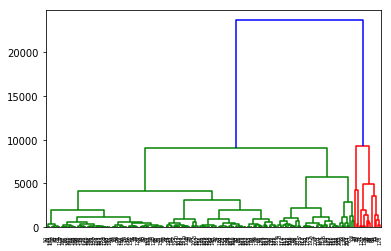

In [88]:
# Step 5. Membentuk dendogram dengan metode centroid
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='centroid'))

Dengan menggunakan method linkage average ternyata dihasilkan 2 clusters juga

In [93]:
# Melakukan fitting hierarchical clustering 
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

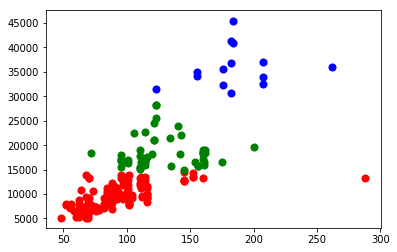

In [94]:
# Mengeplot Data setelah dilakukan hierarchical clustering
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

In [116]:
b=pd.DataFrame(model.labels_)
outputhier=pd.concat([spec,b],axis=1)
outputhier=outputhier.rename(columns={0:'cluster'})
outputhier

,make,engine-size,horsepower,price,cluster
0,alfa-romero,130,111.0,13495.0,0
1,alfa-romero,130,111.0,16500.0,2
2,alfa-romero,152,154.0,16500.0,2
3,audi,109,102.0,13950.0,0
4,audi,136,115.0,17450.0,2
5,audi,136,110.0,15250.0,2
6,audi,136,110.0,17710.0,2
7,audi,136,110.0,18920.0,2
8,audi,131,140.0,23875.0,2
9,audi,131,160.0,NaN,0


In [96]:
resulthier=outputhier['cluster'].value_counts()
resulthier=pd.DataFrame(resulthier)
resulthier

,cluster
0,142
2,49
1,14


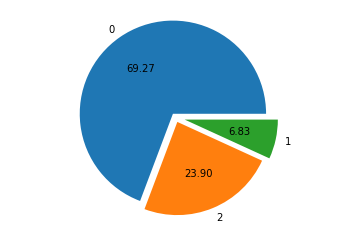

In [97]:
explode = (0.05, 0.05, 0.1)

plt.pie(resulthier['cluster'],labels=resulthier.index, autopct='%.2f', explode=explode)

plt.axis('equal')

plt.show()

## DBSCAN Clustering

In [98]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [149]:
# Step 5. Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps=1000, min_samples=20)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=1000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=20, n_jobs=None, p=None)

In [150]:
# Step 6. Menampilkan label dibangkitkan oleh algoritma dbscan 
print(dbscan.labels_)

[ 0  1  1  0  1  1  1 -1 -1  0  1  1 -1 -1 -1 -1 -1 -1  2  2  2  2  2  2
  2  2  2  2  2  0  2  2  2  2  2  2  2  2  2  2  2  0  2  2  0  0  2 -1
 -1 -1  2  2  2  2  2  2  0  0  1  2  2  2  2  2  2  1  1 -1 -1 -1 -1 -1
 -1 -1 -1  1  2  2  2  2  2  2  0 -1  0  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  0  0  0  1 -1  1  0  0  0  0  1  1  1  1  1  1  1  2  2
  2  2  2  2  0 -1 -1 -1 -1  0  2  2  0  0  1  1  1 -1  2  2  2  2  2  2
  2  2  2  2  2  0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  0  1  2  2  2  2  2  1  1  1  1  2  2  2  2  2  2  2  0  2  0
  0  0  0  0  1  1  1 -1  1 -1 -1 -1 -1]


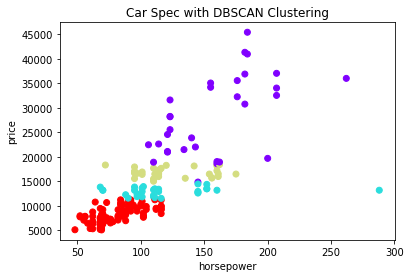

In [151]:
# Step 7 Visualisasi Hasil 
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("horsepower")
plt.ylabel("price")
plt.title("Car Spec with DBSCAN Clustering")
plt.show()

In [115]:
c=pd.DataFrame(dbscan.labels_)
outputDBSCAN=pd.concat([spec,c],axis=1)
outputDBSCAN=outputDBSCAN.rename(columns={0:'cluster'})
outputDBSCAN

,make,engine-size,horsepower,price,cluster
0,alfa-romero,130,111.0,13495.0,0
1,alfa-romero,130,111.0,16500.0,1
2,alfa-romero,152,154.0,16500.0,1
3,audi,109,102.0,13950.0,0
4,audi,136,115.0,17450.0,1
5,audi,136,110.0,15250.0,1
6,audi,136,110.0,17710.0,1
7,audi,136,110.0,18920.0,-1
8,audi,131,140.0,23875.0,-1
9,audi,131,160.0,NaN,0


In [118]:
resultDBSCAN=outputDBSCAN['cluster'].value_counts()
resultDBSCAN=pd.DataFrame(resultDBSCAN)
resultDBSCAN

,cluster
2,112
1,32
-1,31
0,30


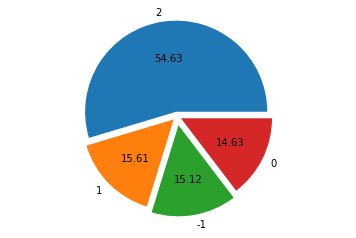

In [119]:
explode = (0.05, 0.05, 0.1,0.05)

plt.pie(resultDBSCAN['cluster'],labels=resultDBSCAN.index, autopct='%.2f', explode=explode)

plt.axis('equal')

plt.show()

### Bonus For My Customer:
Misalkan terdapat salah satu perusahaan yang ingin membeli mobil dengan price terendah namun spesifikasi horse power tertinggi di cluster yang memiliki mean price paling rendah. Dari k-Means clustering-algorithm, kita akan mencarikan mobil yang diinginkan oleh perusahaan tersebut. 

### From K-Means Result

In [161]:
kmeans_cus=outputkmeans[outputkmeans.cluster==0].sort_values('horsepower',ascending=False).head(10)
kmeans_cus

,make,engine-size,horsepower,price,cluster
80,mitsubishi,110,116.0,9959.0,0
171,toyota,146,116.0,11549.0,0
167,toyota,146,116.0,8449.0,0
168,toyota,146,116.0,9639.0,0
169,toyota,146,116.0,9989.0,0
170,toyota,146,116.0,11199.0,0
87,mitsubishi,110,116.0,9279.0,0
88,mitsubishi,110,116.0,9279.0,0
166,toyota,98,112.0,9538.0,0
165,toyota,98,112.0,9298.0,0


Terlihat bahwa ada banyak mobil yang memiliki horse power 116 dengan cluster 0. 
Kita sort lagi dengan price terendah. 

In [181]:
kmeans_cus_id=kmeans_cus[kmeans_cus.horsepower==116].sort_values('price').head(1)
kmeans_cus_id

,make,engine-size,horsepower,price,cluster
167,toyota,146,116.0,8449.0,0


In [210]:
kmeans_cus_id.drop(kmeans_cus_id.index)

print('Anda harus membeli mobil dengan merk : %s' % kmeans_cus_id['make'].values[0] )
print('Harga mobil tersebut adalah :%.2f' %kmeans_cus_id['price'].values[0])
print('Horsepower mobil tersebut adalah :%d' %kmeans_cus_id['horsepower'].values[0])


Anda harus membeli mobil dengan merk : toyota
Harga mobil tersebut adalah :8449.00
Horsepower mobil tersebut adalah :116


## Summary

1. Berapa cluster yang Anda buat? Anda menggunakan atribut/feature apa saja?
    Jawab: Saya membuat 3 cluster. Menggunakan feature: Price and HorsePower
2. Manakah algoritma clustering yang Anda ambil? Mengapa?
    Jawab: Saya menggunakan algoritma K-Means, Hierarchical, dan DBSCAN. Saya menggunakan ketiganya karena ingin mendapatkan perbedaan dari cluster yang dihasilkan. 
3. Apakah masing-masing cluster memiliki ciri-ciri yang berbeda? Apa saja ciri-ciri masing-masing cluster?
    Jawab: Masing-masing cluster terlihat perbedaannya dari jumlah mobil yang berada di masing-masing cluster. Apalagi untuk DBSCAN, terdapat sekitar 14% mobil tidak masuk kedalam cluster apapun (cluster=-1)